In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
DataN=pd.read_csv('New80crosscatalogmuonsALLOHDUFinal.csv')

In [3]:
DataN.set_index(['datetime'],drop=True, inplace=True)


In [4]:
DataN.head()


,runID,ohdu,expoStart,events,eventscut,muonCount
datetime,,,,,,
2019-06-21 14:39:24+00:00,7521,15,1561127964,11,10.0,0
2019-05-09 12:52:46+00:00,6599,15,1557406366,11,8.0,0
2019-05-08 22:16:34+00:00,6586,15,1557353794,9,8.0,0
2019-05-08 23:24:01+00:00,6587,15,1557357841,10,8.0,0
2019-05-09 00:31:25+00:00,6588,15,1557361885,6,6.0,2


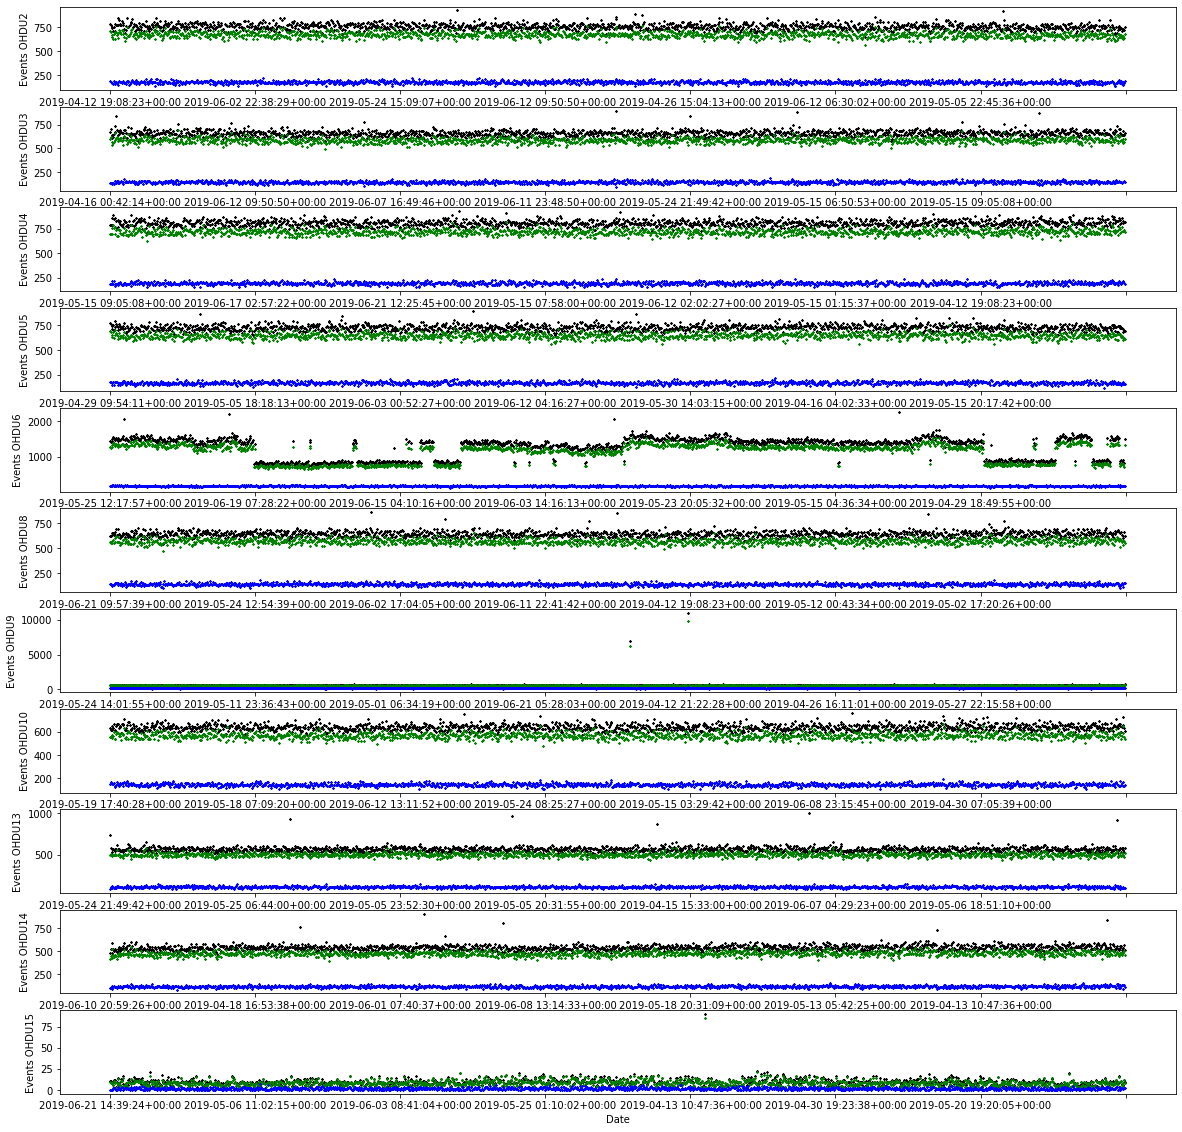

In [35]:
ohdus=[2,3,4,5,6,8,9,10,13,14,15]
fig= plt.figure(figsize=(20,20))
i=0
for ohdu in ohdus:
        i=i+1
        dataF = DataN[DataN['ohdu'] == ohdu]
        axes=plt.subplot(len(ohdus),1,i)
        dataF['events'].plot(subplots=True,marker='*', markersize=2,color='black' ,linestyle='None', ax=axes)
        dataF['eventscut'].plot(subplots=True,marker='*', markersize=2,color='green' ,linestyle='None', ax=axes)
        
        dataF['muonCount'].plot(subplots=True,marker='*', markersize=2,color='blue',linestyle='None', ax=axes)
        axes.set_ylabel('Events OHDU'+str(ohdu))
        axes.set_xlabel('Date')
#plt.tight_layout()
fig.savefig("Event.png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


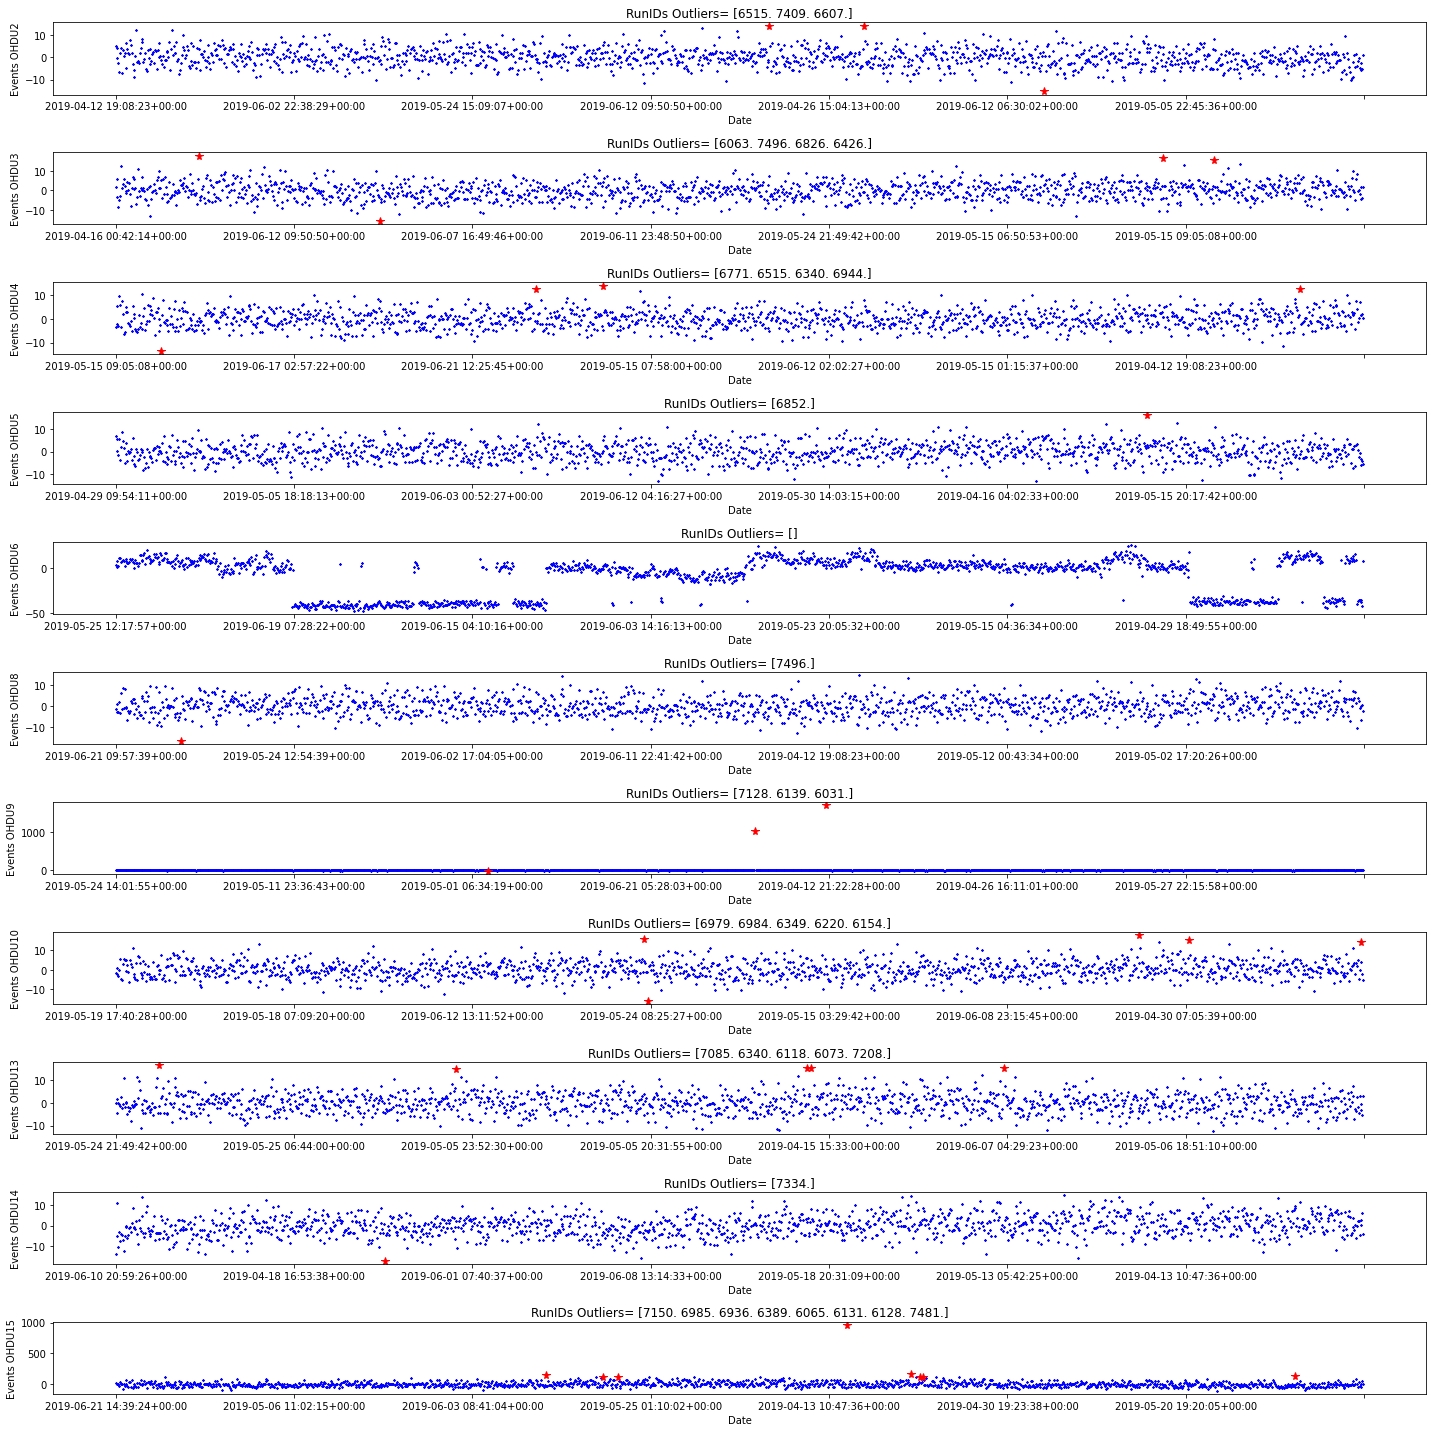

In [15]:
outliers=[]
fig= plt.figure(figsize=(20,20))

i=0
for ohdu in ohdus:
        i=i+1
        dataF = DataN[DataN['ohdu'] == ohdu]
        #Im=dataF['muonCount'].mean()
        Im=np.percentile(dataF['eventscut'], 50)
        dataF['dIoImM']=(dataF['eventscut']-Im)/(Im)*100
        axes=plt.subplot(len(ohdus),1,i)
        fig.subplots_adjust(left=0.2, right=0.9, bottom=0.1, top=0.95, hspace=1.00, wspace=0.00)

        dataF['dIoImM'].plot(subplots=True,marker='*', markersize=2, color='blue', linestyle='None', ax=axes)
        var='dIoImM'
        distance = 2 * (np.percentile(dataF[var], 75) - np.percentile(dataF[var], 25))
        fA=dataF[var]< distance + np.percentile(dataF[var], 75)
        fB=dataF[var] > np.percentile(dataF[var], 25) - distance
        dataF['flag']=dataF['dIoImM'].values*~np.logical_and(fA,fB)
        dataF.loc[np.logical_and(fA,fB)] = np.nan
        dataF['flag'].plot(subplots=True,marker='*', markersize=8, color='red', linestyle='None', ax=axes)
        outliers.append(dataF['runID'][~np.logical_and(fA,fB)])
        axes.set_ylabel('Events OHDU'+str(ohdu))
        axes.set_xlabel('Date')
        plt.title('RunIDs Outliers= '+str(dataF['runID'][~np.logical_and(fA,fB)].values))

plt.tight_layout()

fig.savefig("EventosOutliers.png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


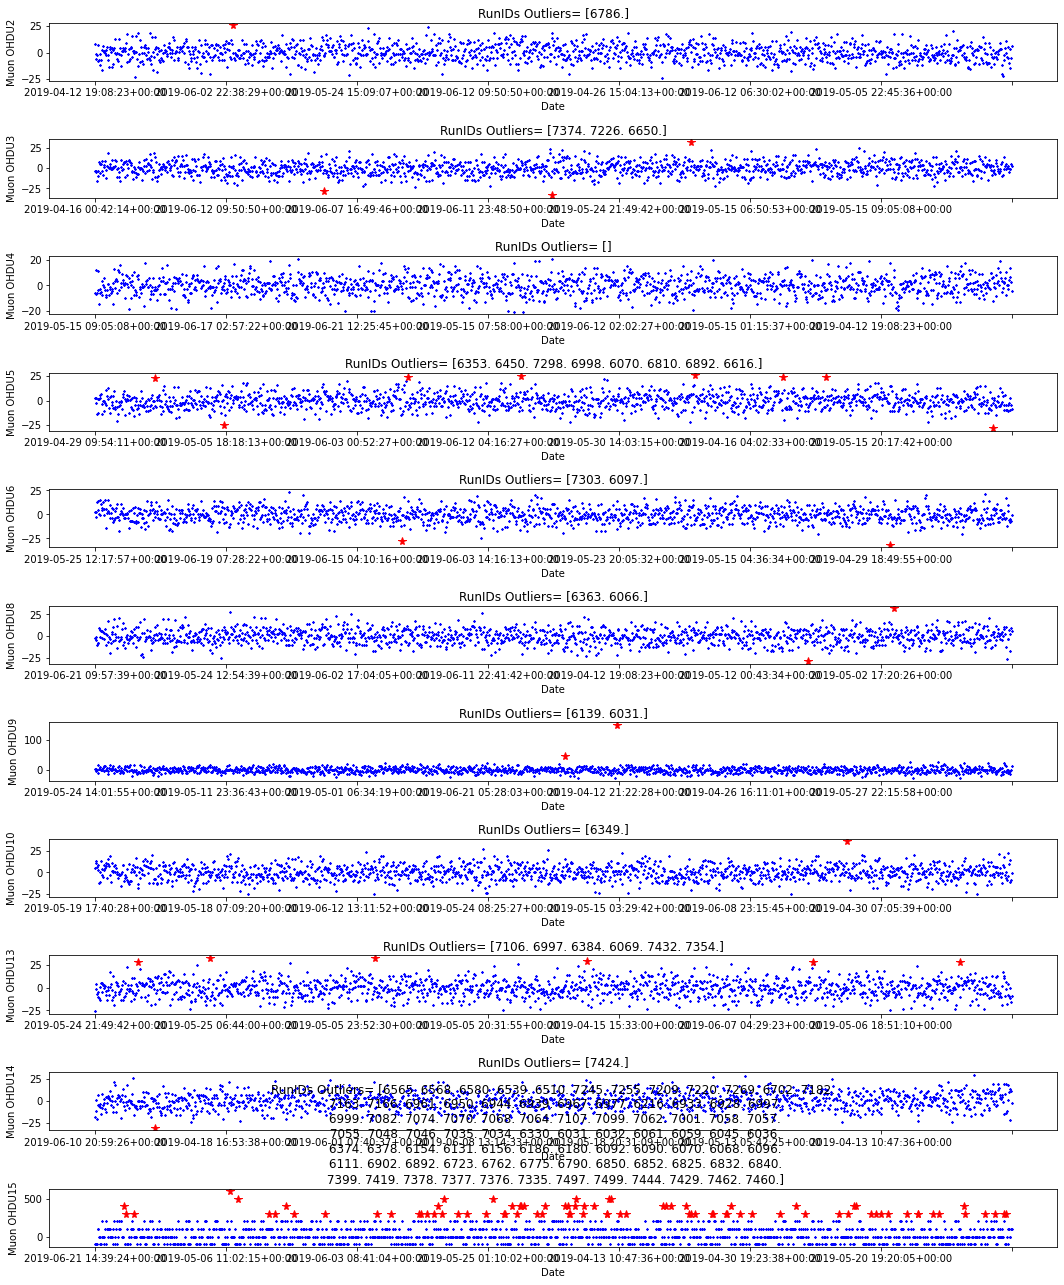

In [33]:

outliers=[]

fig= plt.figure(figsize=(20,20))

i=0
for ohdu in ohdus:
        i=i+1
        dataF = DataN[DataN['ohdu'] == ohdu]
        #Im=dataF['muonCount'].mean()
        Im=np.percentile(dataF['muonCount'], 50)
        dataF['dIoImM']=(dataF['muonCount']-Im)/(Im)*100
        axes=plt.subplot(len(ohdus),1,i)
        fig.subplots_adjust(left=0.2, right=0.9, bottom=0.1, top=0.95, hspace=1.00, wspace=0.00)

        dataF['dIoImM'].plot(subplots=True,marker='*', markersize=2, color='blue', linestyle='None', ax=axes)
        var='dIoImM'
        distance = 2 * (np.percentile(dataF[var], 75) - np.percentile(dataF[var], 25))
        fA=dataF[var]< distance + np.percentile(dataF[var], 75)
        fB=dataF[var] > np.percentile(dataF[var], 25) - distance
        dataF['flag']=dataF['dIoImM'].values*~np.logical_and(fA,fB)
        dataF.loc[np.logical_and(fA,fB)] = np.nan
        dataF['flag'].plot(subplots=True,marker='*', markersize=8, color='red', linestyle='None', ax=axes)
        outliers.append(dataF[['runID','ohdu']][~np.logical_and(fA,fB)])
        
        axes.set_ylabel('Muon OHDU'+str(ohdu))
        axes.set_xlabel('Date')
        plt.title('RunIDs Outliers= '+str(dataF['runID'][~np.logical_and(fA,fB)].values))

plt.tight_layout()

fig.savefig("MuonsOutliers.png")

In [34]:
print((outliers))

[                            runID  ohdu
datetime                               
2019-05-18 07:09:20+00:00  6786.0   2.0,                             runID  ohdu
datetime                               
2019-06-14 18:09:10+00:00  7374.0   3.0
2019-06-07 20:32:44+00:00  7226.0   3.0
2019-05-11 22:29:52+00:00  6650.0   3.0, Empty DataFrame
Columns: [runID, ohdu]
Index: [],                             runID  ohdu
datetime                               
2019-04-28 01:34:44+00:00  6353.0   5.0
2019-05-02 13:58:27+00:00  6450.0   5.0
2019-06-11 04:47:32+00:00  7298.0   5.0
2019-05-28 04:57:51+00:00  6998.0   5.0
2019-04-14 13:45:08+00:00  6070.0   5.0
2019-05-19 09:52:55+00:00  6810.0   5.0
2019-05-23 05:29:28+00:00  6892.0   5.0
2019-05-10 07:56:45+00:00  6616.0   5.0,                             runID  ohdu
datetime                               
2019-06-11 10:23:17+00:00  7303.0   6.0
2019-04-15 20:15:06+00:00  6097.0   6.0,                             runID  ohdu
datetime                 